<a href="https://colab.research.google.com/github/khviyer/NLP-Assessment/blob/main/SPAM%20Text%20Message.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of SPAM Text Messages



### Github: https://github.com/khviyer/NLP-Assessment/edit/main/Spam.ipynb

## The SMS Spam Collection is a publicly accessible dataset used for investigating mobile spam. It comprises of 5,574 English SMS messages, classified as either 'ham' (legitimate) or 'spam'.

### Dataset Link: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
### Dataset References: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

## 1. LOADING THE TEXTUAL DATA

### The Python 'open()' function is utilized for loading the text file, which provides flexibility for handling complex dataframes. The data seems to be tab-delimited.

In [ ]:
rawData = open("SMSSpamCollection").read()
rawData[0:300]

### We can see that the values are seperated by a '\t' which means it is a tab-delimited text file. For tsv files, we can call the Pandas read_csv function and specify '\t' as the seperator.

In [ ]:
parsedData = rawData.replace('\t', '\n').split('\n') # Replace tab characters with new-line characters
parsedData[0:4]

In [ ]:
labels = parsedData[0::2] # Every second element starting from the 0th index
texts = parsedData[1::2] # Every second element starting from the 1st index

print(labels[0:4])
print(texts[0:4])

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

In [ ]:
dataFrame = pd.DataFrame({
    'label': labels[:-1], # Removing the last index from the labels list because it contains a blank element and arrays need to be equal in length
    'body': texts
})

dataFrame.head()

,label,body
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### To replicate the same process as above, we use the Pandas' approach. Note that the above used procedure is more flexible for even complex text files.

In [ ]:
df = pd.read_csv("SMSSpamCollection", sep = "\t", header = None) # Importing tab-delimited file
df.columns = ["label", "body"] # Naming the columns
df.head()

,label,body
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## 2. Text Data Analysis

The dataset comprises 5572 rows and 2 columns. The breakdown of 'ham' and 'spam' messages is checked, and it is confirmed that there are no null values present.

In [ ]:
# Number of rows and columns in the dataset
df.shape

(5572, 2)

In [ ]:
# Number of ham entries
print("Ham: {}".format(len(df[df['label'] == 'ham'])))

# Number of spam entries
print("Spam: {}".format(len(df[df['label'] == 'spam'])))

Ham: 4825
Spam: 747


In [ ]:
# Checking for null values
df.isnull().sum()

label    0
body     0
dtype: int64

### The data doesn't contain any null values, so no further cleaning in that respect is required.

## 3. TEXT PROCESSING: TOKENIZATION AND REMOVAL OF STOPWORDS

The text is cleaned, tokenized, and stop words are removed using Python's string and nltk library. The punctuation percentage and message length are calculated as these might be useful features.

In [ ]:
import string
import re
import nltk
string.punctuation[0:10] # Printing the first 10 punctuations in the string library
stopword = nltk.corpus.stopwords.words('english') # Defining Stopwords
ps = nltk.PorterStemmer() # Defining the Porter Stemmer
wn = nltk.WordNetLemmatizer() # Defining the Word Net Lemmatizer

In [ ]:
def clean_text(text):
    text_nopunct = "".join([char.lower() for char in text if char not in string.punctuation])
    token = re.split("\W+", text_nopunct)
    text_nostopword = [word for word in token if word not in stopword]
    #clean_text = [ps.stem(word) for word in text_nostopword]
    # We use lemmatizing because of it's higher sophistication and we don't have a performance bottleneck
    clean_text = [wn.lemmatize(word) for word in text_nostopword]
    return clean_text

# This Cleaning Function is called by the Vectorizer

### Feature Engineering - Hypothesis is that spam messages are longer and contains less punctuations than normal messages.

In [ ]:
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['punc%'] = df['body'].apply(lambda x: count_punc(x))
df['body_len'] = df['body'].apply(lambda x: len(x) - x.count(" "))

print("Spam: Punctuation Percentage Average = {} and Average Length = {}".format(df[df['label'] == "spam"]['punc%'].mean(),
                                                                                 df[df['label'] == "spam"]['body_len'].mean()))
print("Ham: Punctuation Percentage Average = {} and Average Length = {}".format(df[df['label'] == "ham"]['punc%'].mean(),
                                                                                df[df['label'] == "ham"]['body_len'].mean()))

df.head()

Spam: Punctuation Percentage Average = 4.887148594377507 and Average Length = 115.71753681392235
Ham: Punctuation Percentage Average = 7.4459067357512625 and Average Length = 58.049326424870465


,label,body,punc%,body_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",9.8,92
1,ham,Ok lar... Joking wif u oni...,25.0,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,4.7,128
3,ham,U dun say so early hor... U c already then say...,15.4,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",4.1,49


### It can be seen that our hypothesis is correct, and we can use these two generated features.

## 4. TEXT VECTORIZATION


### Before implementing the vectorizers, we split that data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['body', 'body_len', 'punc%']], df['label'], test_size=0.2)

### Implementing the TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer = clean_text)
tfidf_total = vect.fit(df['body']) # Used for fitting on the whole model later
tfidf_vect_fit = vect.fit(X_train['body'])

tfidf = tfidf_total.transform(df['body']) # Used for fitting on the whole model later
tfidf_train = tfidf_vect_fit.transform(X_train['body'])
tfidf_test = tfidf_vect_fit.transform(X_test['body'])

total_vect = pd.concat([df[['body_len', 'punc%']].reset_index(drop=True),
           pd.DataFrame(tfidf.toarray())], axis=1) # Used for fitting on the whole model later
X_train_vect = pd.concat([X_train[['body_len', 'punc%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punc%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punc%,0,1,2,3,4,5,6,7,...,7852,7853,7854,7855,7856,7857,7858,7859,7860,7861
0,57,5.3,0.195276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,3.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55,7.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31,6.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,3.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Classification

### We implement Machine Learning Classification models on the dataset to determine if a given message is spam or ham.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support as score

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.992 / Recall: 0.833 / Accuracy: 0.977


In [ ]:
import time # GradientBoostingClassifier seems to take a lot of time

gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)
print(fit_time)

y_pred = gb_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

212.88605499267578
Precision: 0.923 / Recall: 0.88 / Accuracy: 0.974


In [ ]:
nbClassifier = GaussianNB()

nbClassifier.fit(X_train_vect, y_train)
y_pred = nbClassifier.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.589 / Recall: 0.907 / Accuracy: 0.902


## Random Forests classifier seems to be the best fit for our use case with an accuracy of 97.7% and a Precision very close to unity. Now we train the whole model on the classifier.

In [ ]:
rf_model = rf.fit(total_vect, df['label'])

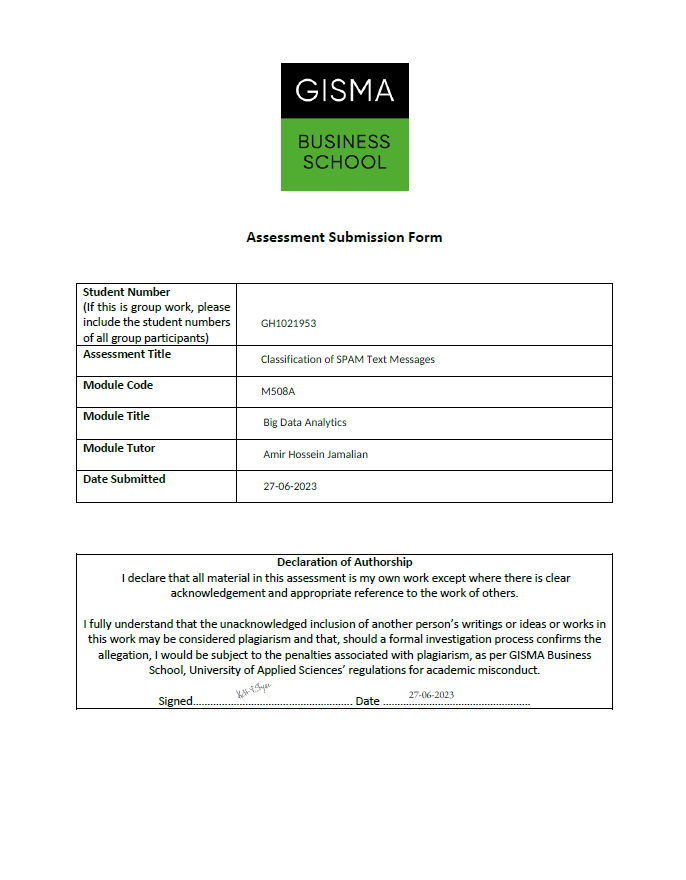